<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Skin_disease_Prediction_using_Transfer_learning/blob/main/Skin_disease_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.listdir()

['.config', 'sample_data']

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("subirbiswas19/skin-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 17.3M/17.3M [00:00<00:00, 84.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1


In [6]:
dataset_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1"

# List the contents of the dataset directory
print("Dataset Contents:", os.listdir(dataset_dir))

Dataset Contents: ['skin-disease-datasaet']


In [7]:
dataset_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1"

# List the contents of the dataset directory
print("Dataset Contents:", os.listdir(dataset_dir))

Dataset Contents: ['skin-disease-datasaet']


In [8]:
train_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/train_set"
test_dir = "/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set"


In [3]:
dataset_url = '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set'

In [9]:
os.listdir(train_dir)

['PA-cutaneous-larva-migrans',
 'BA-impetigo',
 'BA- cellulitis',
 'VI-chickenpox',
 'FU-athlete-foot',
 'VI-shingles',
 'FU-nail-fungus',
 'FU-ringworm']

In [10]:
import pathlib
data_dir=pathlib.Path(train_dir)
data_dir

PosixPath('/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/train_set')

In [11]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [12]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [13]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [14]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [15]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [16]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [17]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [18]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

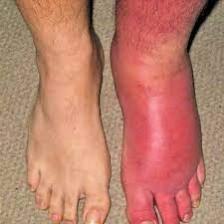

In [20]:
PIL.Image.open(str(cellulitis[6]))

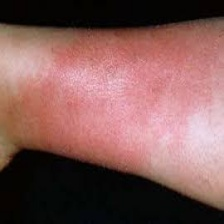

In [21]:
PIL.Image.open(str(cellulitis[16]))

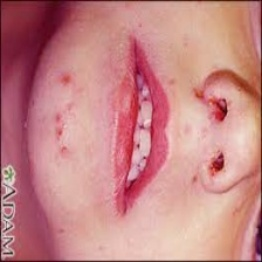

In [22]:
PIL.Image.open(str(BA_impetigo[16]))

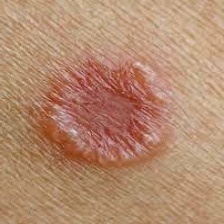

In [23]:
PIL.Image.open(str(FU_ringworm[4]))

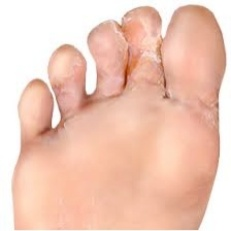

In [24]:
PIL.Image.open(str(FU_athlete_foot[16]))

In [25]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [26]:
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('normal/*')),
}

In [27]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [28]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [29]:
x_train[0].shape

(224, 224, 3)

In [30]:
len(disease_images_train_dic['ringworm']),len(disease_images_train_dic['shingles'])

(90, 130)

In [31]:
len(x_train)

925

In [32]:
len(y_train)

925

In [33]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(925,)

In [34]:
import pathlib
data_dir=pathlib.Path(test_dir)
data_dir

PosixPath('/root/.cache/kagglehub/datasets/subirbiswas19/skin-disease-dataset/versions/1/skin-disease-datasaet/test_set')

In [35]:
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('test_set/normal/*')),
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [36]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [37]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [38]:
x_test.shape

(234, 224, 224, 3)

In [39]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [40]:
x_train_scaled[0]

array([[[0.2       , 0.2       , 0.24705882],
        [0.20784314, 0.20784314, 0.25490196],
        [0.21960784, 0.21960784, 0.26666667],
        ...,
        [0.25490196, 0.31764706, 0.38431373],
        [0.23529412, 0.29803922, 0.36470588],
        [0.21568627, 0.27843137, 0.34509804]],

       [[0.2       , 0.2       , 0.24705882],
        [0.20784314, 0.20784314, 0.25490196],
        [0.21960784, 0.21960784, 0.26666667],
        ...,
        [0.26666667, 0.32941176, 0.39607843],
        [0.24705882, 0.30980392, 0.37647059],
        [0.22745098, 0.29019608, 0.35686275]],

       [[0.20392157, 0.20392157, 0.25098039],
        [0.21176471, 0.21176471, 0.25882353],
        [0.22352941, 0.22352941, 0.27058824],
        ...,
        [0.2745098 , 0.3372549 , 0.40392157],
        [0.25490196, 0.31764706, 0.38431373],
        [0.23921569, 0.30196078, 0.36862745]],

       ...,

       [[0.18823529, 0.16470588, 0.28627451],
        [0.20392157, 0.18039216, 0.30196078],
        [0.2       , 0

In [78]:
from tensorflow.keras import layers, Sequential

In [80]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models



In [83]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 as a feature extractor (without the top classification layer)
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,  # Remove fully connected layers
                         weights='imagenet') # Use pre-trained weights

# Freeze the base model to avoid updating its weights during training
base_model.trainable = False

# Create a new model with MobileNetV2 as feature extractor
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Converts feature maps into a single vector
    layers.Dense(9, activation='softmax')  # Adjust for your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
model.fit(x_train_scaled,y_train,epochs=15)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │          11,529 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,269,513 (8.66 MB)

 Trainable params: 11,529 (45.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.2957 - loss: 2.0088
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8249 - loss: 0.6814
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8826 - loss: 0.4288
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9306 - loss: 0.3035
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9566 - loss: 0.2195
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9694 - loss: 0.1674
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9826 - loss: 0.1405
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9881 - loss: 0.1165
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9878 - loss: 0.1075
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9944 - loss: 0.0867
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9981 - loss: 0.0808
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9980 - lo

In [84]:
x_test_scaled.shape

(234, 224, 224, 3)

In [85]:
model.evaluate(x_test_scaled,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9735 - loss: 0.1348


[0.1447978913784027, 0.9700854420661926]

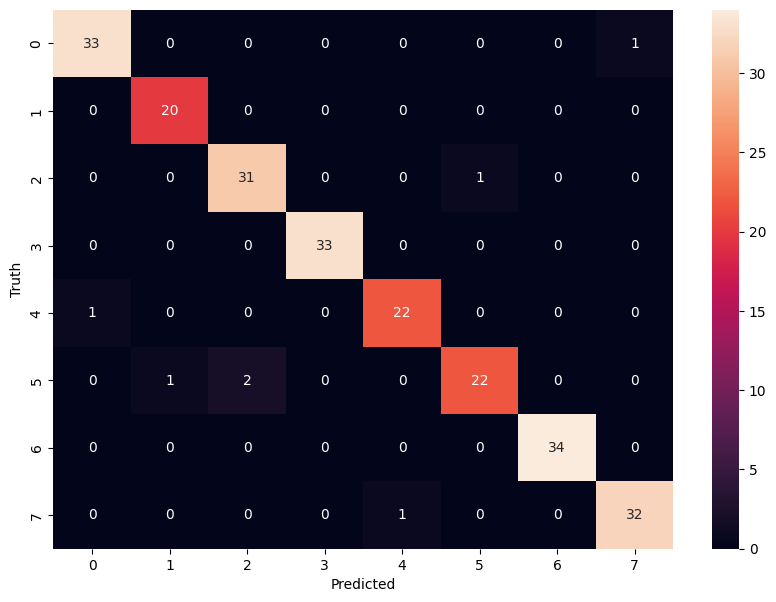

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [114]:
'''# prompt: wnat model format fore streamlit web app

import streamlit as st
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Load your trained model (replace 'your_model.h5' with the actual filename)
model = keras.models.load_model('/content/skin_disease_model.sav')

# Define class labels (replace with your actual class labels)
class_labels = ['cellulitis', 'impetigo', 'athlete-foot', 'nail-fungus', 'ringworm',
                'cutaneous-larva-migrans', 'chickenpox', 'shingles']

def preprocess_image(image):
    img = cv2.resize(np.array(image), (224, 224))  # Resize to match training input
    img = img / 255.0 # Normalize
    return np.expand_dims(img, axis=0)

def predict_disease(image):
  processed_image = preprocess_image(image)
  prediction = model.predict(processed_image)
  predicted_class_index = np.argmax(prediction)
  predicted_class = class_labels[predicted_class_index]
  probability = prediction[0][predicted_class_index]

  return predicted_class, probability

st.title("Skin Disease Classifier")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")

    predicted_class, probability = predict_disease(image)

    st.write(f"Predicted class: {predicted_class}")
    st.write(f"Confidence: {probability:.2%}")


# --- Optional: Add confusion matrix visualization (if you have the data) ---
# Assuming you have a confusion_matrix variable from your training process
# st.subheader("Confusion Matrix")
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# st.pyplot(plt)'''


'# prompt: wnat model format fore streamlit web app\n\nimport streamlit as st\nimport numpy as np\nimport pandas as pd\nimport cv2\nfrom PIL import Image\nimport tensorflow as tf\nfrom tensorflow import keras\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Load your trained model (replace \'your_model.h5\' with the actual filename)\nmodel = keras.models.load_model(\'/content/skin_disease_model.sav\')  \n\n# Define class labels (replace with your actual class labels)\nclass_labels = [\'cellulitis\', \'impetigo\', \'athlete-foot\', \'nail-fungus\', \'ringworm\', \n                \'cutaneous-larva-migrans\', \'chickenpox\', \'shingles\']\n\ndef preprocess_image(image):\n    img = cv2.resize(np.array(image), (224, 224))  # Resize to match training input\n    img = img / 255.0 # Normalize\n    return np.expand_dims(img, axis=0)\n\ndef predict_disease(image):\n  processed_image = preprocess_image(image)\n  prediction = model.predict(processed_image)\n  predicted_class_index = n

In [116]:
# prompt: wnat model to deploy in rasperi pi 4
# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Convert the model
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('skin_disease_model_2.tflite', 'wb') as f:
  f.write(tflite_model)


Saved artifact at '/tmp/tmpyc822__f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_625')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  137326998907664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998908240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998908624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998908432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998907856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998909776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998910160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998910544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998910352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137326998907088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1373269989

In [113]:

import joblib


# Save the model using joblib
joblib.dump(model, 'skin_disease_model.sav')



['skin_disease_model.sav']